In [23]:
from metaflow import Flow

In [294]:
run = Flow('MergeFilterPaginate').latest_successful_run

In [321]:
df = run.data.pages

In [363]:
import seaborn as sns
sns.set()
sns.set_palette(sns.color_palette("RdBu_r", 7))

In [364]:
wpm_df = df.groupby('userId').mean()

In [365]:
eltimes = df.copy()
eltimes['count'] = 1
eltimes = eltimes.groupby('userId').sum()
eltimes = eltimes[['eltime', 'count']]

In [373]:
stats_df = eltimes[['eltime']].join(wpm_df[['wpm']])
stats_df = stats_df.loc[stats_df['eltime'] < 10000]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(stats_df)
stats_df['cluster'] = kmeans.labels_

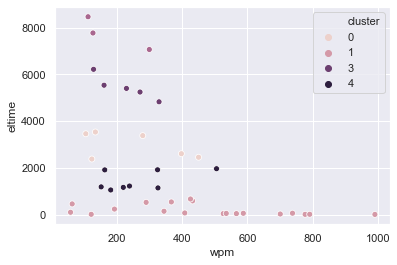

In [399]:
sns.scatterplot(x="wpm", y="eltime", hue='cluster',
                     data=stats_df)

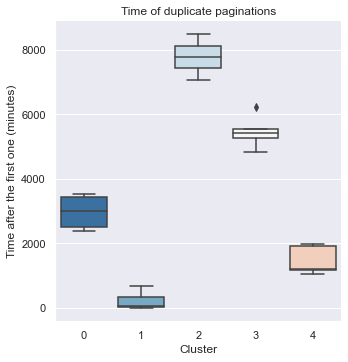

In [400]:
ax = sns.catplot(x="cluster", y="eltime", kind="box", data=stats_df)
ax.set(xlabel='Cluster', ylabel='Time after the first one (minutes)', title='Time of duplicate paginations')

In [401]:
stats_df.groupby('cluster').describe()

eltime                                                                \
         count         mean         std     min       25%      50%       75%   
cluster                                                                        
0          6.0  2967.616667  543.593018  2376.4  2491.050  2991.60  3439.125   
1         19.0   188.989474  232.353868     4.6    30.450    56.90   343.600   
2          3.0  7770.400000  701.357320  7067.2  7420.650  7774.10  8122.000   
3          5.0  5446.160000  507.423899  4827.8  5245.500  5401.40  5537.300   
4          8.0  1443.325000  405.487184  1051.5  1157.575  1202.05  1912.075   

                  wpm                                                  \
            max count        mean         std         min         25%   
cluster                                                                 
0        3533.6   6.0  247.160940  150.917638  103.327087  124.624636   
1         665.0  19.0  468.557674  261.336893   56.521739  316.130349   
2        8469.9   3.0  178.032062  104.548174  110.304685  117.827615   
3        6218.8   5.0  222.620959   81.466301  127.196033  159.428181   
4        1961.4   8.0  262.705615  118.627502  150.579095  175.258664   

                                             
                50%         75%         max  
cluster                                      
0        205.549817  367.269322  449.713521  
1        431.204793  643.900529  991.304348  
2        125.350546  211.895750  298.440955  
3        228.216654  269.903473  328.360456  
4        228.059885  324.059188  504.867445